In [1]:
import os
import pandas as pd
import numpy as np
import sklearn as sk
from pickle import load
from ipyleaflet import (
    Map,
    Marker,
    TileLayer, ImageOverlay,
    Polyline, Polygon, Rectangle, Circle, CircleMarker,
    GeoJSON,
    DrawControl
)
from matplotlib.colors import rgb2hex
from matplotlib import pyplot as plt
import sys
sys.path.append('./lib')
from computeStats import computeOverAllDist, STAT_Descriptions
from numpy_pack import packArray,unpackArray
from util import load_raw_data

In [2]:
import findspark
findspark.init()

from pyspark import SparkContext
sc = SparkContext(master="local[4]",pyFiles=['./lib/numpy_pack.py'])

from pyspark import SparkContext
from pyspark.sql import *
sqlContext = SQLContext(sc)

In [3]:
#https://oceancolor.gsfc.nasa.gov/docs/distfromcoast/dist2coast.txt.bz2

In [4]:
data_dir = './data'
file_index = 'BSSSBSBS'

weather_path = data_dir+'/US_Weather_%s.parquet'%file_index
weather_df=sqlContext.read.parquet(weather_path)

stats_path = data_dir+'/STAT_%s.pickle'%file_index
stats,stat_desc = load(open(stats_path,'rb'))

stations_path = data_dir+'/stations.pkl'
with open(stations_path,'rb') as f:
    stations=load(f)
    
filename=data_dir+'/decon_%s_%s.parquet'%(file_index,'TOBS')
filename=data_dir+'/decon_%s_%s.parquet'%(file_index,'TMAX')

df_in=sqlContext.read.parquet(filename)

In [5]:
df_in.head()

Row(coeff_1=42.25279398504932, coeff_2=212.05890403871575, coeff_3=125.4821090554735, elevation=51.8, label=u'BSSSBSBS', latitude=31.145, longitude=-87.0517, measurement=u'TMAX', res_1=0.9967154827385314, res_2=0.913983447280581, res_3=0.8850150609726188, res_mean=0.02286382732101854, station=u'USW00063899', total_var=23773350.0, undefs=0, vector=bytearray(b'\x88X\x00[([\x18[\x90[\xa0[\x18YxZXZ\x90Z\x00Z\x10X(Y\xa0W\xb0V\x80R\xd0V\x90YhY\xe0R\xf0T\x08Y\xe8Z\xf8X`X\x98ZH[(Z\x08X@W\x18Y\xe8Y\xa0XpX\xa0RpV\x18Z\xc8Z8[\xd8Z\xd8Z\x98[\xf8Z\xa0Z\xe0Y\x90Y\xa0X`Yh[HZ\x80WHY\x00XxX\x80Y\xe0Z0[\xa0[\x98[`W0W\x80W\xc0Y\xb8Z\x88[\x88[\x10\\\x1c\\D\\\x1c\\\xd0[\x0c\\p[\xf0Z\xf0Y\x80[\x80[\xe0[P[([\xf0Z\x88[\xc0[\xd0Z\xc8ZHZd\\\x00Z\x00[\xa0Y\x90Z\xc8Z\xc8Z\xd0[t\\pZXX\xb8ZP[\x04\\\x80[4\\\xd0Z0Z\xa8Z8[\xa0[\xa8[X[X[\x1c\\T\\\xb4\\\xa4\\\xd8\\p\\\x84\\\x80\\\x88\\T\\l\\\x98\\t\\P[\x98\\\x8c\\\xa8\\\xb4\\\xd0\\\xd4\\\x94\\\xd8[\x84\\\xb8\\\xb0\\\x98\\$\\pZ8[\x10\\\xa0[\x00\\\xd8[d\\\x1c\\l\\l\\\xe0\

/home/jared/anaconda3/envs/dse230/lib/python2.7/site-packages/ipykernel_launcher.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


      year  latitude  longitude     coeff_3     coeff_2     coeff_1
1755  1890   31.0833   -88.2333  -32.429928  -13.222422  414.707247
1771  1892   31.0833   -88.2333  138.030073  224.621373 -261.163508
1850  1893   30.4000   -88.5000  -59.841218   -6.837263   -5.865163
1737  1893   31.0833   -88.2333  101.665054  245.023513 -154.383334
1558  1894   30.4000   -88.5000  -53.342480  110.593638   31.458611


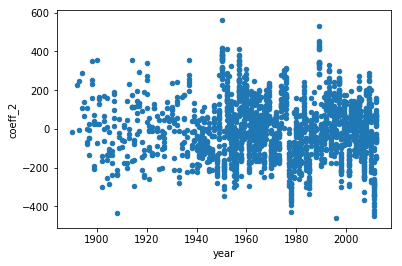

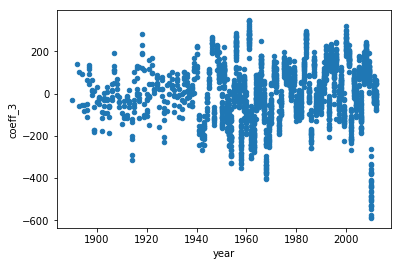

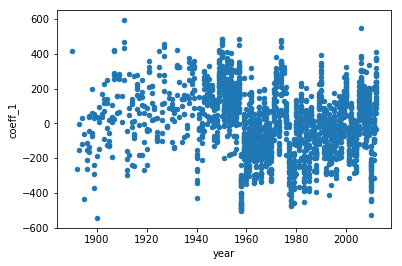

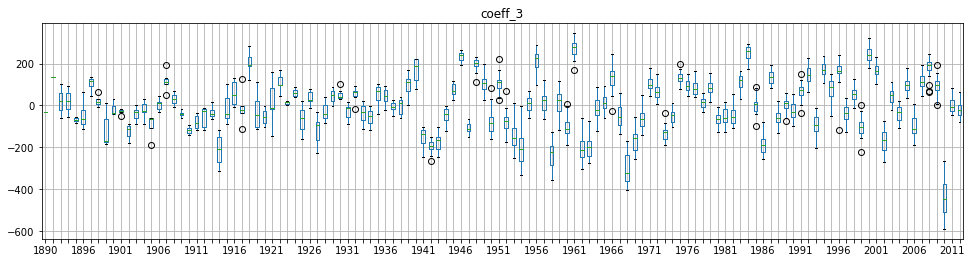

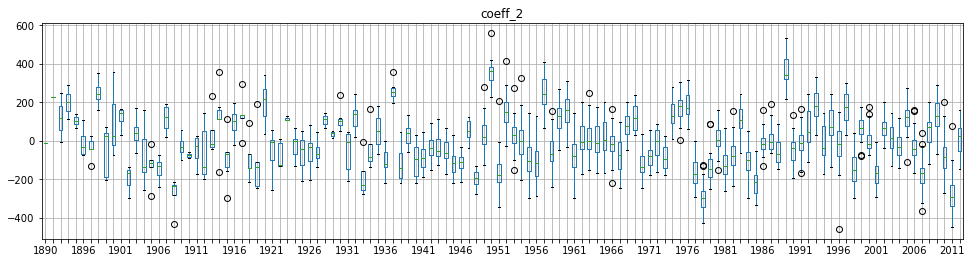

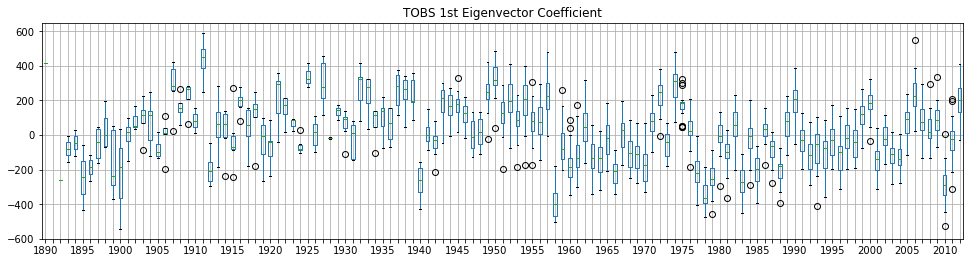

In [6]:
decon_df = df_in.select('year','latitude','longitude','coeff_3','coeff_2','coeff_1').toPandas()
decon_df['year'] = decon_df['year'].astype(int)
decon_df.plot.scatter('year','coeff_2')
decon_df.plot.scatter('year','coeff_3')
decon_df.plot.scatter('year','coeff_1')
ax = decon_df.boxplot('coeff_3',by='year', figsize=(16,4))

for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[::5]:
    label.set_visible(True)
ax.set_xlabel('')
plt.suptitle("")

ax = decon_df.boxplot('coeff_2',by='year', figsize=(16,4))

for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[::5]:
    label.set_visible(True)
ax.set_xlabel('')
plt.suptitle("")

print(decon_df.sort('year').head())
decon_df.loc[len(decon_df)] = [1890,np.nan,np.nan,np.nan,np.nan,np.nan]
decon_df.loc[len(decon_df)] = [1891,np.nan,np.nan,np.nan,np.nan,np.nan]
decon_df.loc[len(decon_df)] = [1892,np.nan,np.nan,np.nan,np.nan,np.nan]
decon_df.loc[len(decon_df)] = [1893,np.nan,np.nan,np.nan,np.nan,np.nan]
decon_df.loc[len(decon_df)] = [1894,np.nan,np.nan,np.nan,np.nan,np.nan]
decon_df.loc[len(decon_df)] = [1895,np.nan,np.nan,np.nan,np.nan,np.nan]
decon_df.loc[len(decon_df)] = [1896,np.nan,np.nan,np.nan,np.nan,np.nan]
decon_df.loc[len(decon_df)] = [1897,np.nan,np.nan,np.nan,np.nan,np.nan]
decon_df.loc[len(decon_df)] = [1898,np.nan,np.nan,np.nan,np.nan,np.nan]
decon_df.loc[len(decon_df)] = [1899,np.nan,np.nan,np.nan,np.nan,np.nan]
decon_df.loc[len(decon_df)] = [1900,np.nan,np.nan,np.nan,np.nan,np.nan]
decon_df['year'] = decon_df['year'].astype(int)
ax = decon_df.boxplot('coeff_1',by='year', figsize=(16,4))

for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[::5]:
    label.set_visible(True)
ax.set_xlabel('')
ax.set_title('TOBS 1st Eigenvector Coefficient')
plt.suptitle("")

plt.show()

In [60]:
from mpl_toolkits.mplot3d import Axes3D
filename=data_dir+'/decon_%s_%s.parquet'%(file_index,'TMAX')

df_in=sqlContext.read.parquet(filename)
avg_decon_df = df_in.select('year','latitude','longitude','elevation','res_1','res_2','res_3','res_mean','coeff_1','coeff_2','coeff_3').toPandas()
avg_decon_df['year'] = avg_decon_df['year'].astype(int)
avg_decon_df = avg_decon_df.groupby(['latitude','longitude']).mean()

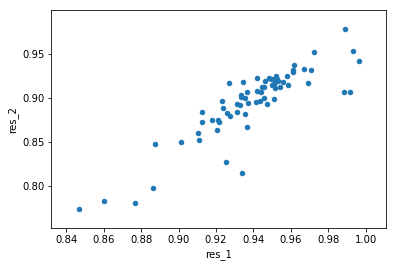

In [9]:
avg_decon_df[['res_mean','res_1','res_2','res_3']].sort_values(by='res_1').plot(kind='scatter',x='res_1',y='res_2')
plt.show()

res_1
res_2
res_3


/home/jared/anaconda3/envs/dse230/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


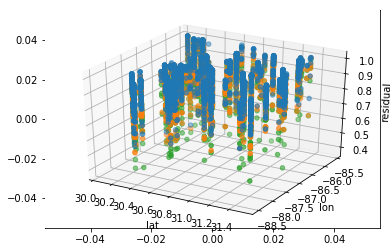

In [10]:
avg_decon_df = df_in.select('year','latitude','longitude','elevation','res_1','res_2','res_3','res_mean').toPandas()
fig, ax = plt.subplots()
threedee = fig.gca(projection='3d')
ax.margins(0.05)
for  group in ['res_1','res_2','res_3']:
    print(group)
    threedee.scatter(avg_decon_df['latitude'],avg_decon_df['longitude'],avg_decon_df[group],label=group)

ax.legend(numpoints=1, loc='upper left')

threedee.set_xlabel('lat')
threedee.set_ylabel('lon')
threedee.set_zlabel('residual')

plt.show()

In [66]:
filename=data_dir+'/decon_%s_%s.parquet'%(file_index,'TMAX')

df_in=sqlContext.read.parquet(filename)
avg_decon_df = df_in.select('year','latitude','longitude','elevation','res_1','res_2','res_3','res_mean','coeff_1','coeff_2','coeff_3').toPandas()
avg_decon_df['year'] = avg_decon_df['year'].astype(int)
avg_decon_df = avg_decon_df.groupby(['latitude','longitude']).mean()

print(avg_decon_df.head())
min_lon=-88.7020508
min_lat=29.9835183
max_lon=-85.245166
max_lat=31.6504527

center = [(min_lat+max_lat)/2, (min_lon+max_lon)/2]
zoom = 7
ms = []
for t in ['coeff_1','coeff_2','coeff_3']:
    m = Map(
        default_tiles=TileLayer(opacity=1.0, url='http://korona.geog.uni-heidelberg.de/tiles/roads/x={x}&y={y}&z={z}'), 
        center=center, 
        zoom=zoom)

    r = Rectangle(bounds=[[min_lat,min_lon],[max_lat,max_lon]], weight=5, fill_opacity=0.0)
    m += r

    for i,row in avg_decon_df.iterrows():
        _lat=i[0]
        _long=i[1]
        _count=row[t]
        if np.isnan(_count):
            continue;
        # taking sqrt of count so that the  area of the circle corresponds to the count
        c = Circle(
            location=(_lat,_long), 
            radius=int(np.abs(_count)*200.0), 
            weight=1,
            color='#F00', 
            opacity=0.4, 
            fill_opacity=0.2, 
            fill_color='black' if _count > 0 else 'red' )
        m.add_layer(c)
    ms.append(m)

                           year  elevation     res_1     res_2     res_3  \
latitude longitude                                                         
30.0667  -85.5833   1959.500000   7.000000  0.921494  0.872272  0.833742   
30.1667  -85.7000   1947.022727   3.763636  0.912339  0.884269  0.853679   
30.2119  -85.6828   2004.000000   6.400000  0.946109  0.919461  0.870249   
30.2333  -88.0167   1958.500000   3.000000  0.886140  0.797926  0.753560   
30.2492  -85.6606   1991.750000   1.500000  0.953106  0.919178  0.882908   

                    res_mean     coeff_1     coeff_2    coeff_3  
latitude longitude                                               
30.0667  -85.5833   0.016843  -42.314323  104.765090  30.243024  
30.1667  -85.7000   0.016267  114.016037  -21.272250 -10.709497  
30.2119  -85.6828   0.015286  108.402867  -27.551833  71.041483  
30.2333  -88.0167   0.017225 -137.605384  158.270143  32.802485  
30.2492  -85.6606   0.018510   37.007419  -21.260958  52.803483  


In [67]:
ms[0]

Widget Javascript not detected.  It may not be installed or enabled properly.


In [68]:
ms[1]

Widget Javascript not detected.  It may not be installed or enabled properly.


In [69]:
ms[2]

Widget Javascript not detected.  It may not be installed or enabled properly.


/home/jared/anaconda3/envs/dse230/lib/python2.7/site-packages/ipykernel_launcher.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  # Remove the CWD from sys.path while we load stuff.
/home/jared/anaconda3/envs/dse230/lib/python2.7/site-packages/ipykernel_launcher.py:21: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


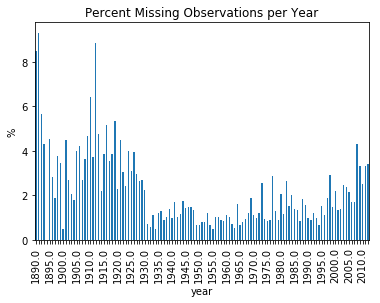

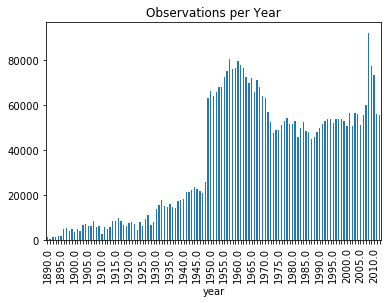

In [15]:
sanity = pd.DataFrame(weather_df.rdd
     .map(lambda x: 
          (x['year'], 
           (sum(map(lambda i:int(i != True),
               np.isfinite(unpackArray(x['vector'],np.float16)))
           ),365)))
     .reduceByKey(lambda x,y: (x[0]+y[0],x[1]+y[1]))
     .map(lambda x: (x[0], 100*float(x[1][0])/x[1][1], x[1][1]-x[1][0]))
     .collect())
ax = sanity.sort(0).plot(kind='bar', y=1,x=0)

ax.legend_.remove()
ax.set_ylabel('%')
ax.set_xlabel('year')
ax.set_title('Percent Missing Observations per Year')
for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[::5]:
    label.set_visible(True)

ax = sanity.sort(0).plot(kind='bar', y=2,x=0)

ax.legend_.remove()
ax.set_ylabel('')
ax.set_xlabel('year')
ax.set_title('Observations per Year')
for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[::5]:
    label.set_visible(True)

plt.show()

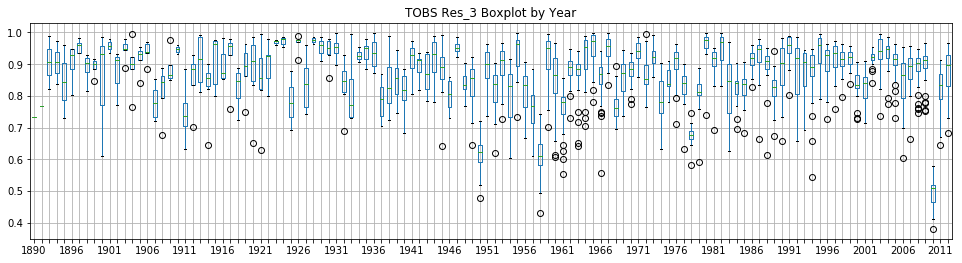

In [16]:
decon_df = df_in.select('year','res_3').sort('res_3').toPandas()
decon_df['year'] = decon_df['year'].astype(int)
ax = decon_df.boxplot(by='year', figsize=(16,4))
ax.set_title('TOBS Res_3 Boxplot by Year')
for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[::5]:
    label.set_visible(True)
ax.set_xlabel('')
plt.suptitle("")
plt.show()

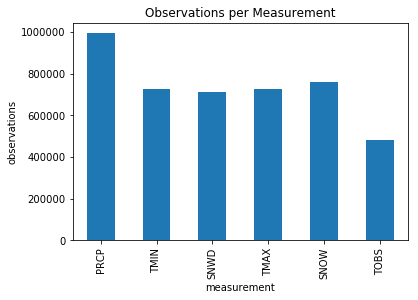

In [17]:
ax = (pd.DataFrame(weather_df.rdd
              .map(lambda x: (x['measurement'], 365 -x['undefs']))
              .reduceByKey(lambda x, y: x+y)
              .collect()).plot(kind="bar",x=0,y=1))
ax.set_ylabel('observations')
ax.set_xlabel('measurement')
ax.legend_.remove()
ax.set_title('Observations per Measurement')
plt.show()

In [34]:
station_counts = weather_df.groupby(['latitude','longitude','station','measurement']).count().sort('count').toPandas()
year_counts = weather_df.groupby(['station','year']).count().sort('year').toPandas()
print(len(station_counts['station'].unique()))
print(station_counts.head())


177
   latitude  longitude      station measurement  count
0   30.6811   -88.1195  US1ALMB0044        SNOW      1
1   31.3667   -86.5167  USC00016942        SNOW      1
2   30.9156   -88.1240  US1ALMB0014        SNOW      1
3   30.5500   -86.7500  USC00085648        PRCP      1
4   30.4000   -88.5000  USC00226054        PRCP      1


        station  count
year                  
1890.0        1      1
1891.0        1      1
1892.0        1      1
1893.0        2      2
1894.0        2      2
1895.0        2      2
1896.0        5      5
1897.0        5      5
1898.0        4      4
1899.0        5      5
1900.0        3      3
1901.0        4      4
1902.0        3      3
1903.0        5      5
1904.0        6      6
1905.0        6      6
1906.0        5      5
1907.0        6      6
1908.0        4      4
1909.0        5      5
1910.0        2      2
1911.0        4      4
1912.0        5      5
1913.0        6      6
1914.0        9      9
1915.0        8      8
1916.0        8      8
1917.0        7      7
1918.0        8      8
1919.0        7      7
...         ...    ...
1983.0       26     26
1984.0       27     27
1985.0       25     25
1986.0       25     25
1987.0       24     24
1988.0       24     24
1989.0       26     26
1990.0       26     26
1991.0       27     27
1992.0       28     28
1993.0     

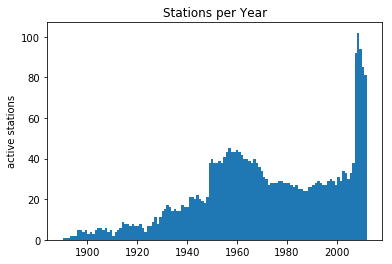

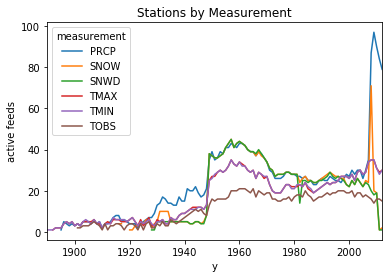

In [52]:
st_yr = (weather_df
    .groupby(['station','year'])
    .count()
    .toPandas())
ax = (st_yr.plot(kind='hist', y='year', bins = len(year_counts['year'].unique())))
ax.set_ylabel('active stations')
ax.set_title('Stations per Year')
ax.legend_.remove()
print(st_yr.groupby('year').count())
plt.show()

s = pd.DataFrame(weather_df
    #.filter(weather_df['year'] == 1960)
    .rdd.map(lambda x: {'v':unpackArray(x['vector'],np.float16),'y':x['year'],'u':x['undefs'],'m':x['measurement']})
    .collect()).sort_values(by='u').groupby(['y','m']).count()
ax = s['u'].reset_index().pivot(index='y', columns='m', values='u').plot.line()
ax.set_ylabel('active feeds')
ax.set_title('Stations by Measurement')
ax.legend_.set_title('measurement')
plt.show()
#http://www.nws.noaa.gov/om/hazstats/sum11.pdf

/home/jared/anaconda3/envs/dse230/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  import sys


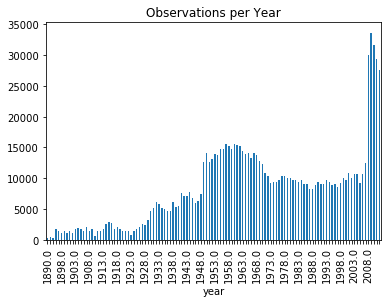

In [20]:
ax = (pd.DataFrame((weather_df.rdd
     .filter(lambda x: x['measurement'] == 'PRCP')
     .map(lambda x: 
          (x['year'], (365 - x['undefs'])))
     .reduceByKey(lambda x,y: x+y)
     .collect()))
        .sort(0)
        .plot(kind='bar', y=1,x=0))

ax.legend_.remove()
ax.set_ylabel('')
ax.set_xlabel('year')
ax.set_title('Observations per Year')
for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[::5]:
    label.set_visible(True)

plt.show()

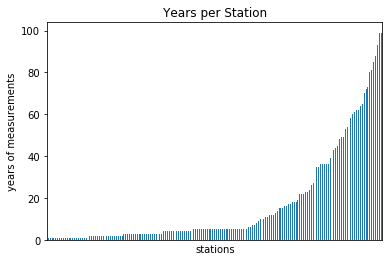

station    USC00082220
count               99
Name: 176, dtype: object


In [21]:
station_by_year = (weather_df
.groupby(['station','year'])
.count()
.groupby('station').count().sort('count')
.toPandas())
oldest = station_by_year.iloc[-1]
ax = station_by_year.plot(kind='bar', x='station',y='count')
ax.set_ylabel('years of measurements')
ax.set_xlabel('stations')
ax.set_title('Years per Station')
ax.legend_.remove()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels

plt.show()
print(oldest)

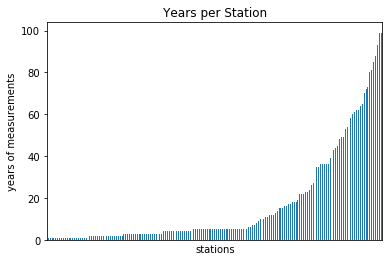

In [29]:
station_by_year = (weather_df
.groupby(['station','year'])
.count()
.groupby('station').count().sort('count')
.toPandas())
oldest = station_by_year.iloc[-1]
ax = station_by_year.plot(kind='bar', x='station',y='count')
ax.set_ylabel('years of measurements')
ax.set_xlabel('stations')
ax.set_title('Years per Station')
ax.legend_.remove()
ax.xaxis.grid()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels
ax.xaxis.grid()
plt.show()

/home/jared/anaconda3/envs/dse230/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


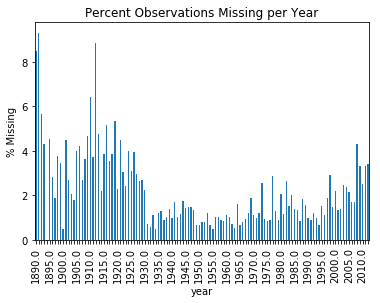

/home/jared/anaconda3/envs/dse230/lib/python2.7/site-packages/ipykernel_launcher.py:28: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


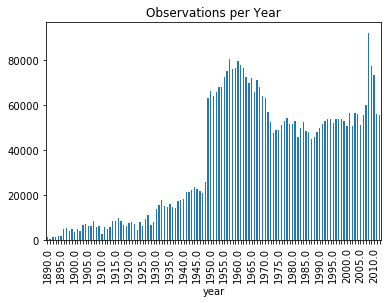

In [30]:
ax = (pd.DataFrame((weather_df.rdd
     .map(lambda x: 
          (x['year'], (x['undefs'],365)))
     .reduceByKey(lambda x,y: 
          (x[0]+y[0], x[1]+y[1]))
     .map(lambda x: 
          (x[0], (float(x[1][0])/x[1][1])*100))
     .collect()))
        .sort(0)
        .plot(kind='bar', y=1,x=0))

ax.legend_.remove()
ax.set_ylabel('% Missing')
ax.set_xlabel('year')
ax.set_title('Percent Observations Missing per Year')
for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[::5]:
    label.set_visible(True)

plt.show()

ax = (pd.DataFrame((weather_df.rdd
     .map(lambda x: 
          (x['year'], (365 - x['undefs'])))
     .reduceByKey(lambda x,y: x+y)
     .collect()))
        .sort(0)
        .plot(kind='bar', y=1,x=0))

ax.legend_.remove()
ax.set_ylabel('')
ax.set_xlabel('year')
ax.set_title('Observations per Year')
for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[::5]:
    label.set_visible(True)

plt.show()

In [31]:
cmap=plt.get_cmap('jet')
def get_color(val):
    x=(val-_min)/(_max-_min)
    return(rgb2hex(cmap(x)[:3]))

In [37]:
min_lon=-88.7020508
min_lat=29.9835183
max_lon=-85.245166
max_lat=31.6504527

center = [(min_lat+max_lat)/2, (min_lon+max_lon)/2]
zoom = 7

m = Map(
    default_tiles=TileLayer(opacity=1.0, url='http://korona.geog.uni-heidelberg.de/tiles/roads/x={x}&y={y}&z={z}'), 
    center=center, 
    zoom=zoom)

r = Rectangle(bounds=[[min_lat,min_lon],[max_lat,max_lon]], weight=5, fill_opacity=0.0)
m += r

for i,row in station_counts.iterrows():
    _lat=row['latitude']
    _long=row['longitude']
    _count=row['count']
    # taking sqrt of count so that the  area of the circle corresponds to the count
    c = Circle(
        location=(_lat,_long), 
        radius=int(400*np.sqrt(_count+0.0)), 
        weight=1,
        color='#F00', 
        opacity=0.4, 
        fill_opacity=0.1, 
        fill_color='black')
    m.add_layer(c)

m

Widget Javascript not detected.  It may not be installed or enabled properly.


In [46]:
prcp_mn_df = pd.DataFrame((weather_df
              .filter(weather_df['measurement'] == 'PRCP')
              .rdd.map(lambda x: ((x['latitude'],x['longitude']), [np.nanmean(unpackArray(x['vector'],np.float16))]))
              .reduceByKey(lambda x,y: np.concatenate((x,y)))
              .map(lambda x: (x[0][0],x[0][1],np.mean(x[1])))
              .collect()))
min_lon=-88.7020508
min_lat=29.9835183
max_lon=-85.245166
max_lat=31.6504527

center = [(min_lat+max_lat)/2, (min_lon+max_lon)/2]
zoom = 7

m = Map(
    default_tiles=TileLayer(opacity=1.0, url='http://korona.geog.uni-heidelberg.de/tiles/roads/x={x}&y={y}&z={z}'), 
    center=center, 
    zoom=zoom)

r = Rectangle(bounds=[[min_lat,min_lon],[max_lat,max_lon]], weight=5, fill_opacity=0.0)
m += r

for i,row in prcp_mn_df.iterrows():
    _lat=row[0]
    _long=row[1]
    _count=row[2]
    # taking sqrt of count so that the  area of the circle corresponds to the count
    c = Circle(
        location=(_lat,_long), 
        radius=int(200*_count), 
        weight=1,
        color='#F00', 
        opacity=0.4, 
        fill_opacity=0.2, 
        fill_color='black')
    m.add_layer(c)

m

Widget Javascript not detected.  It may not be installed or enabled properly.


In [ ]:
for x in stat_desc:
    print(x)

In [ ]:
print(3**2)

In [ ]:
print(stats.keys())

In [ ]:
for m in ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']:
    print('----------')
    print(m)
    for stat in ['mean','std']:
        print(stat+': '+str(stats[m][stat]))

In [ ]:
def agg(x,y):
    summed = x[0] + y[0]
    count = []

    for i in range(365):
        summed
    return ()

df_u = (pd.DataFrame((weather_df
      .rdd.map(lambda x: ((int(x['year']),x['measurement']), [unpackArray(x['vector'],np.float16)]))
      .reduceByKey(lambda x,y: np.concatenate((x,y)))
      .map(lambda x: (x[0], np.nanmean(x[1],axis=0)))
      .map(lambda x: (x[0][0],x[0][1], (np.nanmean(x[1], dtype=np.float64) / (10 if x[0][1] in ['TOBS','TMAX','TMIN'] else 1)) ))
      .collect())))


In [ ]:
tmx = df_u[df_u[1] == 'TMAX'].sort_values(by=0).set_index(0)[2]
print(tmx.head())
ax = tmx.plot(label='TMAX')
df_u[df_u[1] == 'TOBS'].sort_values(by=0).set_index(0)[2].plot(label='TOBS')
df_u[df_u[1] == 'TMIN'].sort_values(by=0).set_index(0)[2].plot(label='TMIN')


ax.set_xticks(tmx.index)
ax.set_xticklabels(tmx.index, rotation=90)
ax.set_ylim([0,40])
plt.rcParams["figure.figsize"] = [16,4]
for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[::5]:
    label.set_visible(True)
ax.set_title('Mean Annual Temperatures')
ax.set_ylabel('Celsius')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_xlabel('')
plt.show()

In [ ]:
tmx = df_u[df_u[1] == 'PRCP'].sort_values(by=0).set_index(0)[2]
ax = tmx.plot(label='PRCP')

ax.set_xticks(tmx.index)
ax.set_xticklabels(tmx.index, rotation=90)

plt.rcParams["figure.figsize"] = [16,4]
for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[::5]:
    label.set_visible(True)
ax.set_title('Mean Annual Precipitation')
ax.set_ylabel('mm')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_xlabel('')
plt.show()

      0            1    2
0  1948  USW00013894  0.0
1  1949  USW00013894  0.0
2  1950  USW00013894  0.0
3  1951  USW00013894  0.0
4  1952  USW00013894  0.0


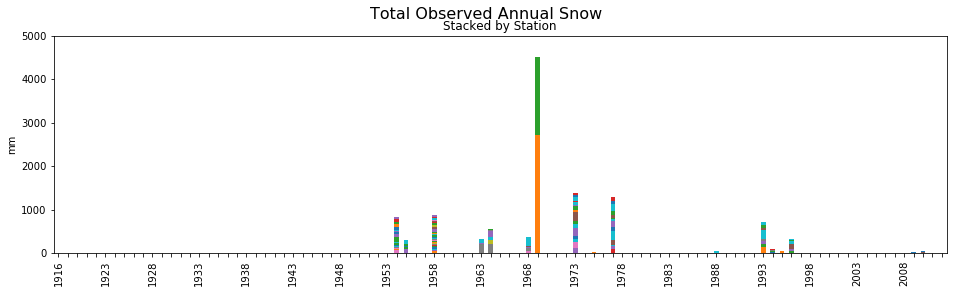

In [74]:
plt.rcParams["figure.figsize"] = [16,4]
df_u = (pd.DataFrame((weather_df
      .filter(weather_df['measurement'] == 'SNOW')
      .rdd.map(lambda x: (int(x['year']),x['station'],np.sum(np.nan_to_num(unpackArray(x['vector'],np.float16)))))
      .collect())))
print(df_u.head())
tmx = df_u.sort_values(by=0).pivot(columns=1,index=0).fillna(0)

ax = tmx.plot.bar(stacked=True,label='SNOW')


plt.rcParams["figure.figsize"] = [16,4]
for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[::5]:
    label.set_visible(True)

ax.set_ylabel('mm')
ax.set_ylim((0,5000))
ax.legend_.remove()
ax.set_xlabel('')
plt.suptitle('Total Observed Annual Snow',fontsize=16)
plt.title('Stacked by Station', fontsize=12)
plt.show()

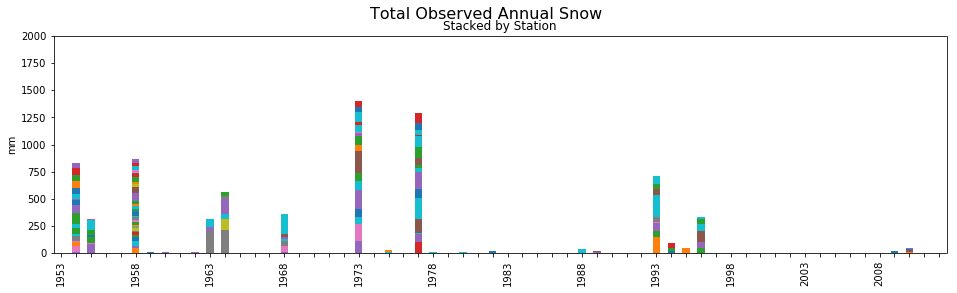

In [72]:

tmx.loc[1969][2].loc['USW00003850'] = 0
tmx.loc[1969][2].loc['USW00003852'] = 0

ax = tmx.loc[1953:].plot.bar(stacked=True,label='SNOW')


plt.rcParams["figure.figsize"] = [16,4]
for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[::5]:
    label.set_visible(True)

ax.set_ylabel('mm')
ax.set_ylim((0,2000))
ax.legend_.remove()
ax.set_xlabel('')
plt.suptitle('Total Observed Annual Snow',fontsize=16)
plt.title('Stacked by Station', fontsize=12)
plt.show()

In [ ]:
print(df_u.head())

In [ ]:
df_u.sort_values(by=2,ascending=False).head()

In [ ]:
import datetime

station_2yr = pd.DataFrame((weather_df
               .filter(weather_df['measurement'] == 'SNOW')
               .filter(weather_df['station'] == 'USW00003850')
               .filter(weather_df['year'] >= 1968)
               .filter(weather_df['year'] <= 1969)
               .rdd.map(lambda x: (x['year'], unpackArray(x['vector'],np.float16)))
               .collect()))
print(station_2yr[0])
for i, val in enumerate(station_2yr[1][1]):
    if val != 0:
        d = datetime.datetime(1969, 1, 1) + datetime.timedelta(i)
        if np.isnan(val):
            print d.strftime("%B %d, %Y") + ': NaN'
        else:
            print d.strftime("%B %d, %Y") + ': '+ str(val)+ ' mm'

In [ ]:
a = [1,2,3,4]
b = [5,6,7,8]
c = [np.nan,4,5,6]
d = [a,b,c]

np.nanmean(d,axis=0)